<h1 style="color:#fce444;font-size:45px;font-family:Georgia;text-align:center;"><strong>🔌Energía de Electrodométicos🔋 <strong style="color:black;font-size:40px;font-family:Georgia;"> <strong style="color:#fce444;font-size:40px;font-family:Georgia;">Proyecto de Aprendizaje de maquinas simulado</strong></strong></strong></h1>
    


###  📊 Actividad de ML ejemplo de regresión

### Descripción del problema:

En este trabajo, se cuenta con un conjunto de datos que registra el consumo de energía de los electrodomésticos en una vivienda durante aproximadamente 4.5 meses. Este registro incluye variables como la temperatura y la humedad en diferentes áreas de la casa, la temperatura y la humedad externas, la presión atmosférica, la velocidad del viento, la visibilidad y el punto de rocío, todos recolectados de una estación meteorológica cercana. También se incluyen dos variables aleatorias que el autor original del conjunto de datos incluyó para probar modelos de regresión y filtrar atributos no predictivos.

### Objetivo del proyecto:

El objetivo de este proyecto es construir un modelo de aprendizaje automático que pueda predecir el consumo de energía de los electrodomésticos en la vivienda basándose en las características ambientales disponibles en el conjunto de datos. Este modelo puede ser de gran utilidad para entender cómo diferentes factores, tanto internos como externos, pueden influir en el consumo de energía de los electrodomésticos. A largo plazo, este conocimiento podría utilizarse para desarrollar estrategias de ahorro de energía o para diseñar sistemas de automatización del hogar más eficientes en términos de energía.

Para lograr este objetivo, se llevarán a cabo los siguientes pasos:

1. **Inspeccionar y mejorar la calidad de los datos:** Esto implica entender la estructura y las características de los datos, lidiar con los valores faltantes o erróneos, y posiblemente transformar los datos para hacerlos más adecuados para los algoritmos de aprendizaje automático.

2. **Diseñar y llevar a cabo experimentos para ajustar los parámetros del modelo:** Esto conlleva seleccionar un algoritmo de aprendizaje automático (o varios) para el modelo, y luego experimentar con diferentes configuraciones de parámetros para encontrar la que ofrece el mejor rendimiento.

3. **Evaluar y comparar el rendimiento de los modelos implementados:** Finalmente, una vez que se haya entrenado el modelos, procedemos a evaluar su rendimiento utilizando métricas apropiadas y posiblemente comparar diferentes modelos para ver cuál funciona mejor.


### Descripción de las variables:
- **T1**:
Temperatura en la zona de la cocina, en grados Celsius

- **RH_1**:
Humedad en la zona de la cocina, en %.

- **T2**:
Temperatura en la zona del salón, en grados Celsius

- **RH_2**:
Humedad en la zona del salón, en %.

- **T3**:
Temperatura en la zona del lavadero

- **RH_3**:
Humedad en la zona del lavadero, en %.

- **T4**:
Humedad en la oficina, en %.

- **RH_4**:
Humedad en la oficina, en %.

- **T5**:
Temperatura en el cuarto de baño, en grados Celsius

- **T6**:
Temperatura en el exterior del edificio (lado norte), en grados Celsius

- **RH_6**:
Humedad en el exterior del edificio (lado norte), en %.

- **T7**:
Temperatura en el cuarto de plancha, en grados Celsius

- **RH_7**:
Humedad en el cuarto de planchado, en %.

- **T8**:
Temperatura en la habitación del adolescente 2, en grados Celsius

- **RH_8**:
Humedad en la habitación de los adolescentes 2, en %.

- **T9**:
Temperatura en la habitación de los padres, en grados Celsius

- **RH_9**:
Humedad en la habitación de los padres, en %.

- **To**:
Temperatura exterior (de la estación meteorológica de Chievres), en Celsius

- **Pressure**:
Presión de la estación meteorológica de Chievres, en mm Hg

- **RH_out**:
Humedad exterior (de la estación meteorológica de Chievres), en %.

- **Wind speed**:
Velocidad del viento de la estación meteorológica de Chievres, en m/s

- **Visibility**:
Visibilidad de la estación meteorológica de Chievres, en km

- **Tdewpoint**:
De la estación meteorológica de Chievres, en Â°C

- **rv1**:
Variable aleatoria 1, adimensional

- **rv2**:
Variable aleatoria 2, no dimensional

- **Payment_Behaviour**:
Representa el comportamiento de pago del cliente (en USD)

- **Monthly_Balance**:
Representa el importe del saldo mensual del cliente (en USD)

- **Credit_Score**:
Representa el rango de la calificación crediticia (mala, normal, buena)


### Importando librerías

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## Leyendo el conjunto de datos

In [388]:
for dirname, _, filenames in os.walk('files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

files/energydata_complete.csv


In [389]:
df = pd.read_csv('files/energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [390]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [391]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


## Exploración de los datos

In [392]:
df.dtypes


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [393]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [394]:
df.shape

(19735, 29)

In [395]:
df.size

572315

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Exploración de Datos

In [397]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Validamos si existen valores nulos en nuestro conjunto de datos

In [398]:
df.isnull().sum().sort_values(ascending = True)


date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

Como se puede ver, nuestro conjunto de datos no tiene valores nulos

#### Abrimos el conjunto de datos de entrenamiento y prueba
Para esto, se utilizó la función train_test_split de la librería ya importada de sklearn.model_selection. Utilizamos el 75% del conjunto de datos para entrenamiento y el 25% para prueba tal y como indicado el siguiente script

In [399]:
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [400]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


**Dividimos las columnas en función del tipo para una gestión clara de las columnas**

In [401]:
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

**Separamos las variables dependientes e independientes**

In [402]:
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [403]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


Verificamos la distribución de valores en la columna de lights

In [404]:
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [405]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### Inferencias
1. **Columnas de temperatura:** la temperatura en el interior de la vivienda varía entre 14,89 y 29,85 grados, mientras que en el exterior (T6) oscila entre -6,06 y 28,29 grados. La razón de esta variación es que los sensores se mantienen fuera de la casa.

2. **Columnas de humedad:** la humedad en el interior de la casa varía entre el 20,60% y el 63,36%, excepto en RH_5 (baño) y RH_6 (exterior de la casa), que varían entre el 29,82% y el 96,32% y entre el 1% y el 99,9%, respectivamente.

3. **Electrodomésticos:** El 75% del consumo de los electrodomésticos es inferior a 100 Wh . Con un consumo máximo de 1080 Wh, habrá valores atípicos en esta columna y un pequeño número de casos en los que el consumo es muy elevado.

4. **Columna de luces** - Inicialmente creía que la columna de luces podría dar información útil. Con 11438 entradas 0 (cero) en 14801 filas, esta columna no añadirá ningún valor al modelo. Yo creía que el consumo de luz junto con el nivel de humedad en una habitación daría una idea de la presencia humana en la habitación y por lo tanto su impacto en el consumo del aparato. Por lo tanto, por ahora, dejaré de lado esta columna.

## Visualización de Datos

In [406]:
df['date'] = pd.to_datetime(df['date'])

fig = px.line(df, x='date', y='Appliances', title='Appliance energy consumption measurement')
fig.update_layout(xaxis_title='Date', yaxis_title='Energy Consumption (Wh)')

fig.show()


array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'T5'}>],
       [<AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>,
        <AxesSubplot:title={'center':'RH_1'}>],
       [<AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'RH_4'}>,
        <AxesSubplot:title={'center':'RH_5'}>,
        <AxesSubplot:title={'center':'RH_6'}>],
       [<AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'RH_9'}>,
        <AxesSubplot:title={'center':'T_out'}>,
        <AxesSubplot:title={'center':'Tdewpoint'}>],
       [<AxesSubplot:title={'center':'RH_out'}>,
        <AxesSubplo

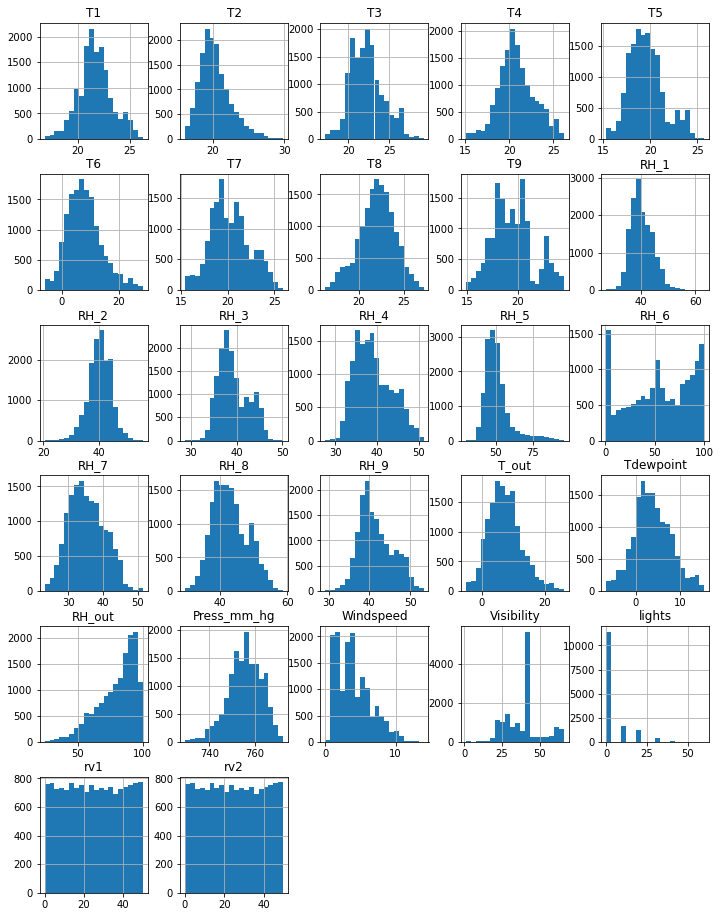

In [407]:
feature_vars.hist(bins = 20 , figsize= (12,16))

Nos centramos en los displots de RH_6, RH_out, Visibility, Windspeed debido a que tienen una distribución irregular

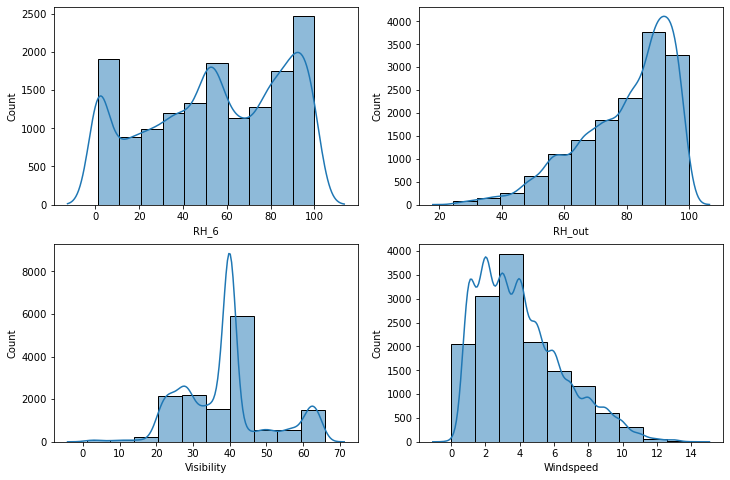

In [408]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.histplot(feature_vars["RH_6"],bins=10, ax= ax[0][0], kde=True, kde_kws={"cut": 3})
vis2 = sns.histplot(feature_vars["RH_out"],bins=10, ax=ax[0][1], kde=True, kde_kws={"cut": 3})
vis3 = sns.histplot(feature_vars["Visibility"],bins=10, ax=ax[1][0], kde=True, kde_kws={"cut": 3})
vis4 = sns.histplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1], kde=True, kde_kws={"cut": 3})

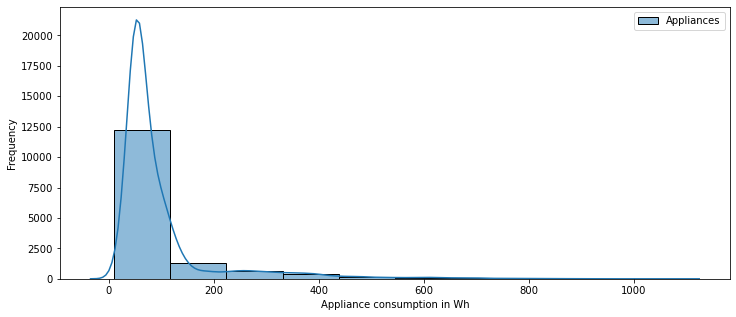

In [409]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.histplot(target_vars , bins=10, kde=True, kde_kws={"cut": 3} ) ;

**Mapa de calor para mostrar la correlación de características**

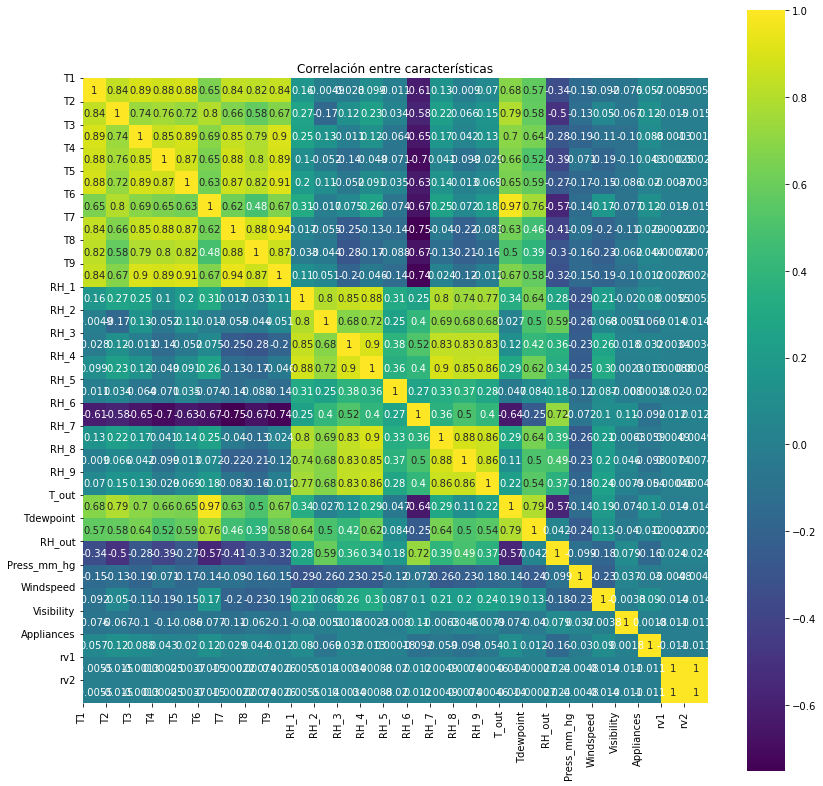

In [410]:
# Utilizamos la columna de weather , temperature , applainces y random  para ver la correlación
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Ocultar los valores repetidos
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(14, 14))
#Generamos el mapa de calor
sns.heatmap(corr, annot=True, square=True, cmap='viridis', vmax=1)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlación entre características")
    #show plot
plt.show()


In [411]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

### Inferencias
1. **Temperatura:** Todas las columnas/variables de temperatura muestran una distribución normal a excepción de la T9. En el mapa de calor, observamos que todas las temperaturas desde la T1 hasta T9 y T_out tienen valores positivos de correlación con la variable objetivo "Aplliances". Para las temperaturas interiores, las correlaciones son saltas, como era de esperar, ya que la ventilación es impulsada por la unidad HRV y minimiza las diferencias de temperatura del aire entre las habitaciones. Cuatro columnas tienen un alto grado de correlación con T9-73,T5,T7,T8 también T6 y T_out tiene una alta correlación (ambas temperaturas del exterior). Por lo tanto, T6 y T9 pueden eliminarse del conjunto de train a futuro, ya que la información que proporcionan puede obtenerse en otros campos.

2. **Columnas de humedad:** Todas las columnas siguen una distribución normal a diferencia de RH_6 y RH_out, debido a que esos sensores están fuera de la casa. El mapa de calor, nos muestra también que no hay casos de correlación significativamente alta (> 0,9) para los sensores de humedad.

3. **Electrodomésticos:** Esta columna está sesgada positivamente, la mayoría de los valores están alrededor de la media 100 Wh. Aunque hay valores atípicos en esta columna.

4. **Columna de luces:** Las columnas de visibility están negativamente sesgadas
5. **Velocidad del viento:** La columna está positivamente sesgada
6. **Variables random:** Estas variables rv1 y rv2 no tienen ningún papel

## Preprocesamiento de Datos

Cambiamos los valores de las variables, para tener una mejor comprensión y facilidad al trabajar con ellas

In [412]:
## diccionario de columnas para renombrar
rename_dict = {
    'Appliances': 'Appliances_energy',
    'lights': 'lights_energy',
    'T1': 'T_kitchen',
    'RH_1': 'RH_kitchen',
    'T2': 'T_livingroom',
    'RH_2': 'RH_livingroom',
    'T3': 'T_laundryroom',
    'RH_3': 'RH_laundryroom',
    'T4': 'T_officeroom',
    'RH_4': 'RH_officeroom',
    'T5': 'T_bathroom',
    'RH_5': 'RH_bathroom',
    'T6': 'T_OutsideBuliding',
    'RH_6': 'RH_OutsideBuilding',
    'T7': 'T_ironingroom',
    'RH_7': 'RH_ironingroom',
    'T8': 'T_teenagerroom2',
    'RH_8': 'RH_teenagerroom2',
    'T9': 'T_parentsroom',
    'RH_9': 'RH_parentsroom',
}

train.rename(columns=rename_dict, inplace=True)
test.rename(columns=rename_dict, inplace=True)

In [413]:
train.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [414]:
test.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Verificamos el tipo de dato de date

In [415]:
train['date'].dtype

dtype('O')

In [416]:
test['date'].dtype

dtype('O')

Convertimos a datetime

In [417]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [418]:
train.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

In [419]:
test.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

In [420]:
col_temp = [rename_dict.get(col, col) for col in col_temp]
col_hum = [rename_dict.get(col, col) for col in col_hum]
col_light = [rename_dict.get(col, col) for col in col_light]
col_target = [rename_dict.get(col, col) for col in col_target]

# No necesitamos actualizar col_weather, col_light, y col_randoms, ya que esos nombres de columnas no cambiaron
# Ahora puedes usar las listas de características actualizadas para seleccionar las columnas en tus conjuntos de datos
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

Procedemos a dividir el conjunto de entrenamiento en variables independiente y dependientes

In [421]:
train_X = train[feature_vars.columns]
train_Y = train[target_vars.columns]

In [422]:
test_X = test[feature_vars.columns]
test_Y = test[target_vars.columns]

In [423]:
train_X.drop(["rv1","rv2","Visibility","T_OutsideBuliding","T_parentsroom"],axis=1 , inplace=True)
test_X.drop(["rv1","rv2","Visibility","T_OutsideBuliding","T_parentsroom"], axis=1, inplace=True)

/var/folders/ld/g46v1vjx41qc0t77b_lw34fh0000gp/T/ipykernel_2845/2166121627.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ld/g46v1vjx41qc0t77b_lw34fh0000gp/T/ipykernel_2845/2166121627.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [424]:
train_X.columns

Index(['T_kitchen', 'T_livingroom', 'T_laundryroom', 'T_officeroom',
       'T_bathroom', 'T_ironingroom', 'T_teenagerroom2', 'RH_kitchen',
       'RH_livingroom', 'RH_laundryroom', 'RH_officeroom', 'RH_bathroom',
       'RH_OutsideBuilding', 'RH_ironingroom', 'RH_teenagerroom2',
       'RH_parentsroom', 'T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg',
       'Windspeed', 'lights_energy'],
      dtype='object')

In [425]:
test_X.columns

Index(['T_kitchen', 'T_livingroom', 'T_laundryroom', 'T_officeroom',
       'T_bathroom', 'T_ironingroom', 'T_teenagerroom2', 'RH_kitchen',
       'RH_livingroom', 'RH_laundryroom', 'RH_officeroom', 'RH_bathroom',
       'RH_OutsideBuilding', 'RH_ironingroom', 'RH_teenagerroom2',
       'RH_parentsroom', 'T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg',
       'Windspeed', 'lights_energy'],
      dtype='object')

In [426]:
test[target_vars.columns] = np.log1p(test[target_vars.columns])
test[target_vars.columns]

,Appliances_energy
6314,4.110874
12257,6.018593
6271,3.433987
18179,3.713572
9661,4.795791
...,...
16384,4.394449
3757,4.615121
19200,3.931826
15776,3.044522


### Escalamiento de datos

In [427]:
scaler = StandardScaler()

train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]

scaler_train = pd.DataFrame(columns=train.columns , index=train.index)
scaler_train[scaler_train.columns] = scaler.fit_transform(train)

scaler_test = pd.DataFrame(columns=test.columns , index=test.index)
scaler_test[scaler_test.columns] = scaler.transform(test)

In [428]:
scaler_train.head()

,T_kitchen,T_livingroom,T_laundryroom,T_officeroom,T_bathroom,T_ironingroom,T_teenagerroom2,RH_kitchen,RH_livingroom,RH_laundryroom,...,RH_ironingroom,RH_teenagerroom2,RH_parentsroom,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights_energy,Appliances_energy
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,2.039003,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.479715,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,2.039003,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.479715,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,0.779644,-0.464759


In [429]:
scaler_test.head()

,T_kitchen,T_livingroom,T_laundryroom,T_officeroom,T_bathroom,T_ironingroom,T_teenagerroom2,RH_kitchen,RH_livingroom,RH_laundryroom,...,RH_ironingroom,RH_teenagerroom2,RH_parentsroom,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights_energy,Appliances_energy
6314,-0.675904,-0.338108,-0.769034,-0.278304,-0.808043,-0.407878,-0.954056,-0.362702,-0.433414,0.290190,...,-0.411218,-0.728495,-0.445117,-0.242965,-1.169997,-1.298225,0.356682,-0.839939,-0.479715,-0.910610
12257,0.818973,0.281881,1.449390,0.314850,1.073098,0.824557,1.061660,0.657450,1.060268,-0.230739,...,-0.282666,-0.983573,-0.560989,0.866248,0.481062,-0.952669,-0.422821,-0.023279,0.779644,-0.892075
6271,-0.848230,-1.050565,-0.534024,-0.523409,-0.650678,-0.600615,-0.936974,-0.193653,0.146419,0.409697,...,0.681474,0.525908,0.679663,-1.634980,-1.289351,1.176402,0.595489,-0.907994,-0.479715,-0.917187
18179,0.943546,0.475912,0.966037,1.148206,1.145450,1.522213,1.415265,-0.429652,-0.517180,-0.888685,...,-0.351673,-0.676334,-1.041960,0.589730,0.564610,-0.317292,0.681099,-1.248270,0.779644,-0.914471
9661,0.009248,-0.368425,-0.402352,-0.142679,-0.590988,-0.268075,0.344202,-0.806246,-0.328880,-1.038689,...,-1.019568,-1.021740,-1.194513,-0.318379,-0.008288,0.518731,0.897377,-0.023279,-0.479715,-0.903956


**Removemos la variables objetivo del conjunto de entrenamiento y prueba**

In [430]:
train_X =  scaler_train.drop(['Appliances_energy'] , axis=1)
train_Y = scaler_train['Appliances_energy']

test_X =  scaler_test.drop(['Appliances_energy'] , axis=1)
test_Y = scaler_test['Appliances_energy']

In [431]:
train_X.head()

,T_kitchen,T_livingroom,T_laundryroom,T_officeroom,T_bathroom,T_ironingroom,T_teenagerroom2,RH_kitchen,RH_livingroom,RH_laundryroom,...,RH_OutsideBuilding,RH_ironingroom,RH_teenagerroom2,RH_parentsroom,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights_energy
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,2.039003
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.479715
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,2.039003
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.479715
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,0.779644


In [432]:
train_Y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances_energy, dtype: float64

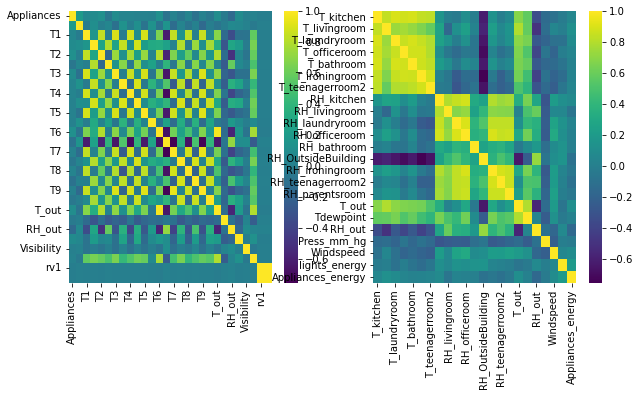

In [433]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.heatmap(df.corr(), cmap='viridis')

plt.subplot(1, 2, 2)
sns.heatmap(scaler_train.corr(), cmap='viridis')

plt.show()

In [434]:
print("Antes del preprocesamiento:")
print(df.describe())
print("\nDespués del preprocesamiento:")
print(scaler_train.describe())

Antes del preprocesamiento:
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813    

## Implementación del Modelo

### Árboles de decisión

In [435]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Ajustar el árbol de decisión simple
dt_simple = DecisionTreeRegressor(random_state=42)
dt_simple.fit(train_X, train_Y)

# Predecir y calcular el error cuadrático medio
y_pred_simple = dt_simple.predict(test_X)
mse_simple = mean_squared_error(test_Y, y_pred_simple)

print("Error cuadrático medio del árbol de decisión simple: ", mse_simple)


Error cuadrático medio del árbol de decisión simple:  1.8902192254874788


In [436]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en malla
params = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Ajustar GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_Y)

print("Mejores parámetros: ", grid_search.best_params_)


Mejores parámetros:  {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [437]:
# Ajustar el árbol de decisión con los mejores parámetros
dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                random_state=42)
dt_best.fit(train_X, train_Y)

# Predecir y calcular el error cuadrático medio
y_pred_best = dt_best.predict(test_X)
mse_best = mean_squared_error(test_Y, y_pred_best)

print("Error cuadrático medio del árbol de decisión con los mejores parámetros: ", mse_best)

Error cuadrático medio del árbol de decisión con los mejores parámetros:  1.3929590893441666


In [440]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Árbol de decisión simple
y_pred_simple = dt_simple.predict(test_X)
print("Árbol de Decisión Simple:")
print("Error Absoluto Medio (MAE): ", mean_absolute_error(test_Y, y_pred_simple))
print("Error Cuadrático Medio (MSE): ", mean_squared_error(test_Y, y_pred_simple))
print("Coeficiente de determinación R2: ", r2_score(test_Y, y_pred_simple))

# Árbol de decisión con los mejores parámetros
y_pred_best = dt_best.predict(test_X)
print("\nÁrbol de Decisión con los Mejores Parámetros:")
print("Error Absoluto Medio (MAE): ", mean_absolute_error(test_Y, y_pred_best))
print("Error Cuadrático Medio (MSE): ", mean_squared_error(test_Y, y_pred_best))
print("Coeficiente de determinación R2: ", r2_score(test_Y, y_pred_best))


Árbol de Decisión Simple:
Error Absoluto Medio (MAE):  0.9200405386421278
Error Cuadrático Medio (MSE):  1.8902192254874788
Coeficiente de determinación R2:  -48067.78033872234

Árbol de Decisión con los Mejores Parámetros:
Error Absoluto Medio (MAE):  0.9073242544604859
Error Cuadrático Medio (MSE):  1.3929590893441666
Coeficiente de determinación R2:  -35422.32211188008


### RandomForest

In [441]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_default = RandomForestRegressor(random_state=0)
rf_default.fit(train_X, train_Y)

pred_rf_default = rf_default.predict(test_X)

mse_rf_default = mean_squared_error(test_Y, pred_rf_default)

print("Error cuadrático medio del Random Forest simple: ", mse_rf_default)

Error cuadrático medio del Random Forest simple:  1.324632028166376


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(train_X, train_Y)

print("Mejores parámetros: ", grid_search_rf.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
best_grid_rf = grid_search_rf.best_estimator_

pred_rf_best = best_grid_rf.predict(test_X)

mse_rf_best = mean_squared_error(test_Y, pred_rf_best)

print("Error cuadrático medio del Random Forest con los mejores parámetros: ", mse_rf_best)

In [ ]:
from math import sqrt

# Para el modelo Random Forest por defecto
mae_rf_default = mean_absolute_error(test_Y, pred_rf_default)
rmse_rf_default = sqrt(mse_rf_default)

# Para el modelo Random Forest con los mejores parámetros
mae_rf_best = mean_absolute_error(test_Y, pred_rf_best)
rmse_rf_best = sqrt(mse_rf_best)

print("Para el modelo Random Forest por defecto:")
print("Error cuadrático medio (MSE): ", mse_rf_default)
print("Error absoluto medio (MAE): ", mae_rf_default)
print("Raíz del error cuadrático medio (RMSE): ", rmse_rf_default)

print("\nPara el modelo Random Forest con los mejores parámetros:")
print("Error cuadrático medio (MSE): ", mse_rf_best)
print("Error absoluto medio (MAE): ", mae_rf_best)
print("Raíz del error cuadrático medio (RMSE): ", rmse_rf_best)